In [1]:
import time

time.ctime()

'Wed Sep 13 21:53:09 2023'

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import importlib as il

import itertools as it
import random
import warnings

from scipy import optimize

# needed?
from skimage.transform import hough_line, hough_line_peaks, rotate
from skimage.feature import canny
from skimage.io import imread

from ipydex import Container

%load_ext ipydex.displaytools
%matplotlib inline

In [3]:
import stage_2a_bar_selection as bs
il.reload(bs)

from stage_2a_bar_selection import (
    load_img,
    rgb,
    get_bbox_list,
    assign_row_col,
    index_combinations,
    find_missing_boxes,
    handle_missing_boxes,
    select_bar_from_file,
    Attr_Array,
    rotate_img,
    CavityCarrierImageAnalyzier,

)


colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

In [4]:
# img_dir = "/home/ck/iee-ge/XAI-DIA/image_classification/stage2/single_bars/raw2/
img_dir = "/home/ck/mnt/XAI-DIA-gl/Carsten/bilder_jpg2a/cropped/chunk000_stage1_completed/C0"
img_fpath = f"{img_dir}/2023-06-26_06-17-52_C50.jpg"

# relevant for angle debugging: a4

In [5]:
ccia = CavityCarrierImageAnalyzier(img_fpath)

(bs.get_border_columns(cell)) := (1, 23)

---

(bs.get_border_columns(cell.T)) := (0, 102)

---

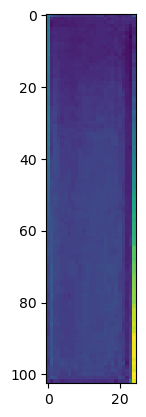

In [6]:
cell = ccia.get_raw_cell("a", "4", 0, 0)
bs.get_border_columns(cell) ##:
bs.get_border_columns(cell.T) ##:
plt.imshow(cell)

In [7]:
il.reload(bs)
ccia = bs.CavityCarrierImageAnalyzier(img_fpath)

CPU times: user 348 ms, sys: 3.17 ms, total: 351 ms
Wall time: 346 ms


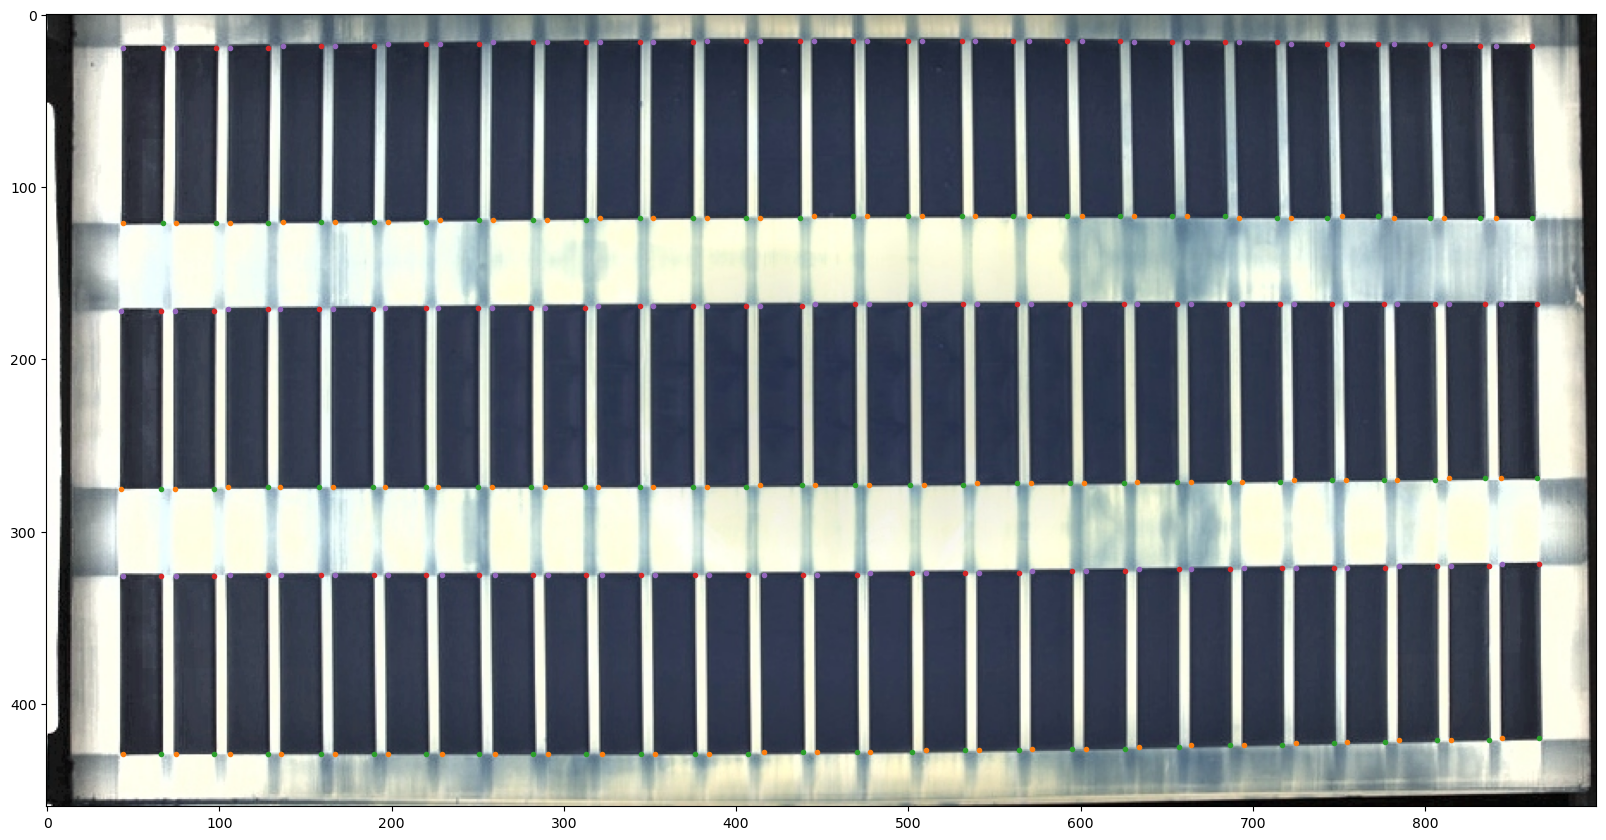

In [8]:
%%time
plot = True

if plot:
        plt.figure(figsize=(20, 20))

corners_list = []
for row, col in bs.cell_tups:
    dc = Container()

    corner_res = ccia.find_cell_corners(row, col, plot=plot, dc=dc)
    corners_list.append(corner_res)

if plot:
    plt.imshow(dc.self.img)

In [9]:
corner_res.upper_left ##:
corner_res.upper_right ##:

corner_res.lower_left ##:
corner_res.lower_right ##:

(corner_res.upper_left) := (845, 319)

---

(corner_res.upper_right) := (866, 319)

---

(corner_res.lower_left) := (845, 420)

---

(corner_res.lower_right) := (866, 420)

---

In [10]:
%%time

ccia.find_cell_corners("a", "4")

CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.11 ms
